In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\loan_approval_dataset.csv")

In [18]:
df.shape

(4269, 13)

In [19]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [20]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [21]:

df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [22]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [23]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df[' education'] =le.fit_transform( df[' education'])

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [33]:
#df=pd.get_dummies(df,columns = [' self_employed'])
cat_cols = [' education',' self_employed']
le = LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])


In [15]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [43]:
dtc = DecisionTreeClassifier(max_depth= 4,random_state=50)
X=df.drop(" loan_status", axis=1)
Y=df[' loan_status']
X_train, X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.3 , random_state=42)

dtc.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=4, random_state=50)

In [44]:
pred_y = dtc.predict(X_test)

In [46]:
print("Accuracy score:", accuracy_score(Y_test,pred_y))
print("Classification Report:",classification_report(Y_test,pred_y))

Accuracy score: 0.9617486338797814
Classification Report:               precision    recall  f1-score   support

    Approved       0.95      1.00      0.97       810
    Rejected       1.00      0.90      0.95       471

    accuracy                           0.96      1281
   macro avg       0.97      0.95      0.96      1281
weighted avg       0.96      0.96      0.96      1281



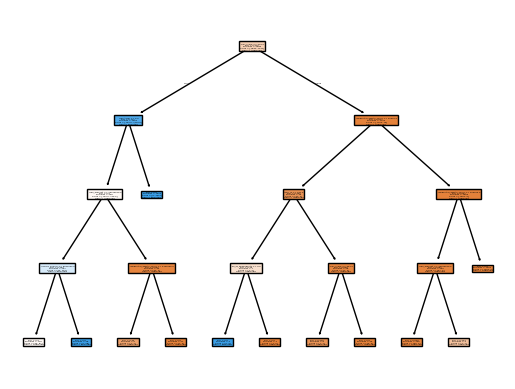

In [47]:
from sklearn import tree
plt.figure(figure=(20,10))
tree.plot_tree(
    dtc,
    feature_names=X.columns,
    class_names=['Approved','Rejected'],
    filled=True
)
plt.show()